# Task- 1 : Prediction using supervised machine learning

*The aim is to predict students score based on his study hours*

# GRIPMAY21   The Sparks Foundation

### Created by - Kaivalya Fakatkar 

In [1]:
#Importing pandas 
import pandas as pd

In [2]:
#Importing the dataset from source
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Exploratory data analysis
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.isnull().sum()   #Checking for null values

Hours     0
Scores    0
dtype: int64

In [6]:
df.shape      #Shape of the data

(25, 2)

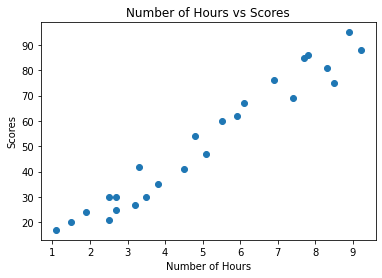

In [7]:
#Visualization
import matplotlib.pyplot as plt
plt.scatter(df.Hours, df.Scores)           #Scatter plot
plt.title("Number of Hours vs Scores")
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.show()

***From the above scatter plot, we can easily see that there is linear relation between hours and scores***

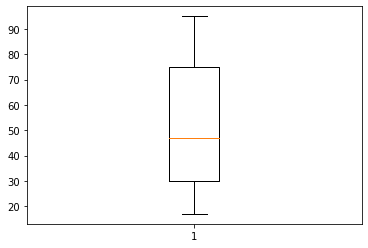

In [8]:
#Cheking for outliers
plt.boxplot(df.Scores)      #Boxplot
plt.show()

In [9]:
#Correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


***Here we can see that there is a strong correlation between two variables***

In [10]:
#Training the model
import statsmodels.formula.api as smf
model = smf.ols('Scores~Hours', data=df).fit()

In [11]:
model.summary()       #Summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 09 May 2021   Prob (F-statistic):           9.13e-17
Time:                        18:17:31   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***We can see that the R-squared value is 0.953 which is very good for the model***

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

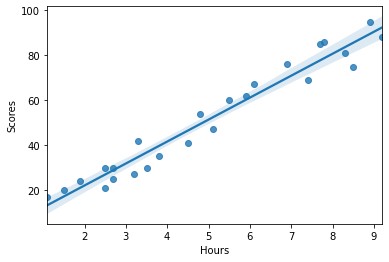

In [12]:
import seaborn as sns
sns.regplot(x="Hours", y="Scores", data=df)     #Regression plot

In [13]:
#As we have trained our model now it's time to predict the values
predicted_scores = model.predict(df.Hours)

In [14]:
#Comparing actual values and predicted values
data = pd.DataFrame({'Actual': df.Scores, 'Predicted': predicted_scores})
data.head()

,Actual,Predicted
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985


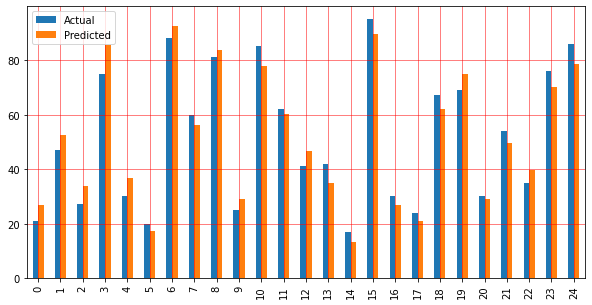

In [15]:
#Visualizing actual values and predicted values
data.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [16]:
#Now we will predict the score if a student studies 9.25 hrs/day
data_point = pd.Series(9.25)
data_pred=pd.DataFrame(data_point,columns=['Hours'])
model.predict(data_pred)

0    92.909855
dtype: float64

***From the above result we can say that if a student studies for 9.25 hrs/day then there are high chances that he might get a score of 92.99***